<a href="https://colab.research.google.com/github/marianerod/CaseMetro/blob/main/CaseMetro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

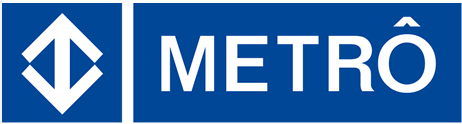

# **Case Metrô**

Estime quanto o metrô (instituição) fatura em 1 hora de pico em São Paulo. Considere as seguintes premissas:

1. Somente metrô (não considera CPTM).
2. Horário de pico pré-pandemia em dia útil da semana.

# Obtenção dos Dados

### Informações necessárias:

1. Quantas pessoas utilizam o metrô por dia útil?

  De acordo com as premissas, selecionei os dados do ano de 2019 do metrô de SP. Sendo assim, em média, **3,7 milhões de passageiros** utilizaram o metrô de SP por dia útil.


2. Quais os horários de pico?

  Em 2019, 34% do total de embarques ocorreram nos períodos das **7h às 9h** e das **17h às 19h**, caracterizados como horários de pico.


- De acordo com a **[CNN Brasil](https://www.cnnbrasil.com.br/nacional/tarifa-do-trem-e-do-metro-em-sp-sobe-de-r-230-para-r-5-em-17-anos-veja-historico-de-aumentos/)** , em 2019, o preço da passagem era de **R$ 4,30**.

Essas informações foram obtidas através do **Relatório Integrado de 2019** do Metrô de SP, que você pode ver nesse [link](https://www.metro.sp.gov.br/wp-content/uploads/2023/05/relatorio-integrado-2019.pdf).

# Resolução Simples

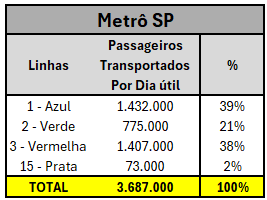

- 3.687.000 de usuários por dia útil
- 34% do total de embarques nos horários de pico
- Preço da passagem 4,30.


In [3]:
# Usuários em dia útil * proporção de embarques nos horários de pico
prop_pass = 3687000 * 0.34
prop_pass

1253580.0

In [4]:
# Proporção de usuários em horário de pico * valor da passagem
fat_total_pico = prop_pass * 4.3
fat_total_pico

5390394.0

In [5]:
# Total faturado nos horários de pico / quantidade de horas (pico)
fat_hora_pico = fat_total_pico/4
fat_hora_pico

1347598.5

O metrô fatura em 1 hora de pico em dia útil o equivalente a **R$ 1.347.598,50**.

# Resolução Complexa

Irei considerar as seguintes premissas:

- **1ª Premissa:** Média dos horários de pico no período da manhã sendo às 8h e no período da tarde às 18h.

Estou considerando esses horários, devido a rotina de trabalho  (início e fim da jornada) e estudos da maioria dos usuários do metrô da cidade de São Paulo e, levando em consideração que eles levam algum tempo para se deslocarem até o seu destino.

- **2ª Premissa:** Distribuição dos passageiros, sendo 17% no período da manhã e 17% no período da tarde.

Como informado anteriormente, 34% dos passageiros embarcam durante os horários de pico. Sendo assim, irei considerar que os embarques no metrô assumem uma distribuição normal em torno dos horários de pico e, o restante dos passageiros (66%) embarcam ao longo do dia (uniformemente).

- **3ª Premissa:** Desvio padrão de 0,5, que equivale a meia hora.

Esse desvio padrão equivale a variação que pode existir na rotina de quem embarca no metrô durante os horários de pico, além da aglomeração que acontece frequentemente nas plataformas durante o embarque, que faz com que os usuários fiquem aguardando até o metrô chegar.


In [36]:
# Importando as bibliotecas necessárias

import numpy as np # realizar operações matemáticas complexas
import matplotlib.pyplot as plt # manipular gráficos
from scipy.stats import norm # realizar cálculos estatísticos

In [8]:
# Dados

usuarios = 3687000
prop = 0.34
preco = 4.3

# Premissas

pico_manha = 8
pico_tarde = 18
desvio_padrao = 0.5
dist_manha = 0.17
dist_tarde = 0.17
dist_dia = 0.66

In [9]:
# Gerar um array horas

horas = np.linspace(0, 24, 2000)

Essa função irá gerar um *array*  **'horas'** que conterá valores que representam uma escala de tempo entre 0 e 24 horas, com uma resolução alta (2.000 pontos).

In [13]:
# Calculando PDF

pdf_pico_manha = norm.pdf(horas, pico_manha, desvio_padrao)
pdf_pico_tarde = norm.pdf(horas, pico_tarde, desvio_padrao)

Essas funções irão resultar em um *array* que descreve a probabilidade de um evento em cada hora do dia (manhã e tarde ), baseado na distribuição normal.

In [14]:
# Calculando as distribuições

dist_pico_manha = dist_manha * pdf_pico_manha * usuarios
dist_pico_tarde = dist_tarde * pdf_pico_tarde * usuarios
dist_dia = dist_dia * usuarios / 24 * np.ones_like(horas)

Nesse código, multiplicamos a distribuição de passageiros (manhã, tarde e dia) pela PDF (com exceção da variável "dist_dia"), que ajuda a **ajustar a densidade de probabilidade para refletir a proporção de eventos que acontecem nesses períodos**.

Ao multiplicar pelos usuários do metrô em dia útil, converte a PDF em um **número absoluto de eventos esperados** (nº de passageiros esperados em cada um desses períodos.

Criei outro *array* com o mesmo formato que horas, porém de 1s. Nesse caso, o código representa uma **distribuição uniforme dos eventos ao longo de 24 horas, ponderada pela proporção de eventos fora dos horários de pico**.

In [15]:
# Somando as distribuições

dist_total = dist_pico_manha + dist_pico_tarde + dist_dia

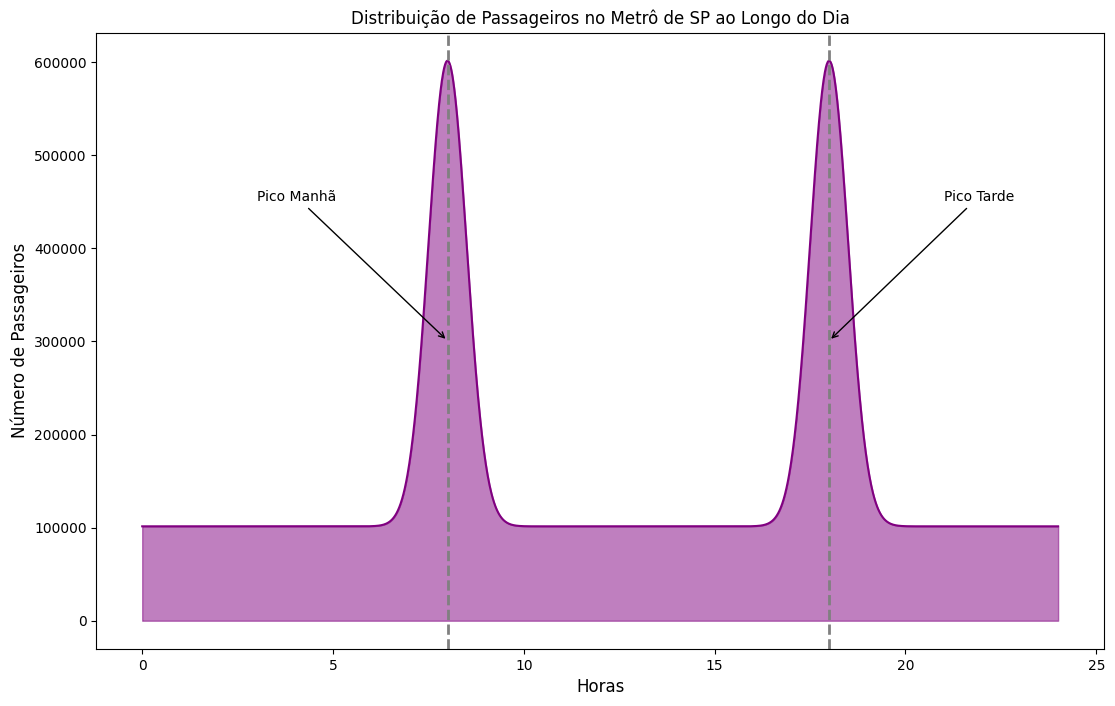

In [54]:
# Plotando o gráfico

plt.figure(figsize=(13, 8)) # cria uma figura alterando o tamanho
color_graf = "#800080" #Cor principal
plt.plot(horas, dist_total, color = color_graf) # Plotando a distribuição de passageiros
plt.fill_between(horas, dist_total, color = color_graf, alpha = 0.5) # Preenchendo a área sob a curva

# Identificando os horários de pico da manhã e tarde
plt.annotate('Pico Manhã', xy=(8, max(dist_total)/2), xytext=(3, 3*max(dist_total)/4),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.annotate('Pico Tarde', xy=(18, max(dist_total)/2), xytext=(21, 3*max(dist_total)/4),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Identificando média dos horários de pico com uma linha tracejada
plt.axvline(x=8, color='gray', linestyle='--', linewidth=2, label='Pico Manhã')
plt.axvline(x=18, color='gray', linestyle='--', linewidth=2, label='Pico Tarde')

# Eixos
plt.xlabel('Horas', fontsize=12) # Eixo x
plt.ylabel('Número de Passageiros', fontsize=12) # Eixo y
plt.title('Distribuição de Passageiros no Metrô de SP ao Longo do Dia') # Título do Gráfico
plt.show() # Exibir o gráfico

Após plotar o gráfico da nossa distribuição de passageiros do metrô ao longo do dia, identificando os horários de pico, irei **calcular a quantidade de passageiros nos horários de pico utilizando CDF** (Função de Distribuição Acumulada).

A CDF em um ponto específico (horário) fornece a probabilidade acumulada de que um evento (número de passageiros) ocorra até esse ponto. Ela é especialmente útil se você estiver assumindo que os dados seguem uma distribuição normal.

In [44]:
# Calculando a quantidade de passageiros nos horários de pico usando CDF

def aproximado (array, value): # Função para encontrar o valor mais próximo no array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

cdf_manha = dist_manha * norm.cdf(horas, pico_manha, desvio_padrao) * usuarios # CDF para horário da manhã
cdf_tarde = dist_tarde * norm.cdf(horas, pico_tarde, desvio_padrao) * usuarios # CDF para horário da tarde

usuarios_pico_manha = (cdf_manha[aproximado(horas, 9)] - cdf_manha[aproximado(horas, 7)])
usuarios_pico_tarde = (cdf_tarde[aproximado(horas, 19)] - cdf_tarde[aproximado(horas, 17)])

print(f"Quantidade de passageiros no pico da manhã (7h-09h): {int(usuarios_pico_manha)}")
print(f"Quantidade de passageiros no pico da tarde (17h-19h): {int(usuarios_pico_tarde)}")

Quantidade de passageiros no pico da manhã (7h-09h): 598606
Quantidade de passageiros no pico da tarde (17h-19h): 598605


In [56]:
import math # Importando biblioteca que realiza cálculos matemáticos

# Calculando a quantidade de passageiros em 1 hora nos picos da manhã e tarde
print("Quantidade de passageiros em 1h no pico da manhã:", math.floor(598606/2))
print("Quantidade de passageiros em 1h no pico da tarde:", math.floor(598605/2))

Quantidade de passageiros em 1h no pico da manhã: 299303
Quantidade de passageiros em 1h no pico da tarde: 299302


In [50]:
print("Média de passageiros em 1 hora de pico:", math.floor((299303 + 299302)/2))

Média de passageiros em 1 hora de pico: 299302


In [51]:
print("O metrô fatura em 1 hora no horário de pico o equivalente a: ", round(299302 * 4.30, 2))

O metrô fatura em 1 hora no horário de pico o equivalente a:  1286998.6


Podemos concluir que, o metrô da cidade de São Paulo fatura em 1 hora de pico, em dia útil, o equivalente à **R$ 1.286.998,60**.
